<a href="https://colab.research.google.com/github/nicholasfurl/Great-Courses/blob/main/Lesson04_neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
#I guess these are pandas format. Doc says it opens bundle but
#X is DataFrame type with Value field describing pixel1, pixel 2 etc with 7000 values each
#y is Series type with 7000 entries and one number for each entry (presumably labels)
#plus y has Name field and appears to be defining nine categories stored in strings?
#This seems to take a long time to run.
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X)
print(y)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [ ]:
#Lesson doesn't like pandas dataframe and wants to convert to numpy array
#Presumably I need to import numpy for this
import numpy as np
X = np.array(X)
y = np.array(y)
print('X: '+str(X.shape)+'\n'+str(X))
print('y: '+str(y.shape)+'\n'+str(y))


X: (70000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y: (70000,)
['5' '0' '4' ... '4' '5' '6']


In [ ]:
#Looks like lesson wants to randomise the rows / stimulus order

#Not sure how I feel about having to import every single thing from a completely different course. Lots to have to memorize.
from sklearn.utils import check_random_state

#RandomState type. 0 appears to be the seed (are 0 and None equivalent?)
random_state = check_random_state(0)
print('random_state: '+'\n'+str(random_state))

#Appears to be a 7000 element column (nd array) of random numbers. I can do this with one line in matlab without importing anything or creating extraneous objects. An improvement?
permutation = random_state.permutation(X.shape[0])
print('permutation: '+str(X.shape)+'\n'+str(permutation))


random_state: 
RandomState(MT19937)
permutation: (70000, 784)
[10840 56267 14849 ... 42613 43567 68268]


In [ ]:
#This seems relatively transparent but don't forget things you've learned about Python:
#You can index the rows of an ndarray without mentioning the columns (hence one number for index)
#reshape has this -1 which will automatically compute the size of the remaining (fully determined) dimension after you've specified the rest already.

#Randomise rows / stimuli in X (pixels) and y (labels) and then reshape X so that ?? It looks the same to me
X = X[permutation]
y = y[permutation]

print('X before reshape: '+str(X.shape)+'\n'+str(X))
X = X.reshape((X.shape[0], -1))
print('X after reshape: '+str(X.shape)+'\n'+str(X))


X before reshape: (70000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X after reshape: (70000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#This sample code keeps redefining X and y and I worry they will not be correct if I need to rerun blocks. 
#In case I want to start over, apparently this code will delete all variables in "workspace"
#Except apparently the obj iterator I create here (which, by the way, is for some reason a str!)
#Ignore this when running ML lesson

objects = dir()
for obj in objects:
  if not obj.startswith("__"):
    del( globals()[obj] )


In [ ]:
#So far sklearn has had .datasets, .model_selection and .utils plus function names within these to learn
from sklearn.model_selection import train_test_split

#From the doc on train_test_split, it appears the randomisation can be done by this function instead of doing it above (maybe?)
#Doc also says this takes pandas DataFrames - did we need to convert to nparray?
#From the doc, I wonder if python allows the arguments to be entered in any order, provided they have the right variable names?
#Also, from the doc, I think you only need to specify train_size or test_size unless their sum doesn't equal the number of observations
train_samples = 5000
test_samples = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=test_samples)

In [ ]:
#visualise training stimulus / image / row

#Gets the pixels and reshapes them
#I would like to try to automatise the reshape
#It's not apparent now that the stored data in mnist_784 specifies the image dimensions
#Maybe it expects me to look it upo in documentation and specify manually.
i=417 #Some arbitrary stimulus. I guess I'd need all those extra lines of codes to produce a random one?
rows_reshaped_image = 28
img = np.array(X_train[i]).reshape(rows_reshaped_image,-1)
#print('img: '+str(img.shape)+'\n'+str(img))


label for 417th training image is: 1


KeyError: ignored

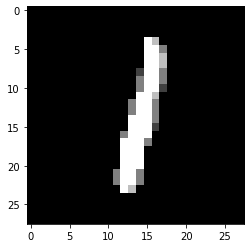

In [ ]:
#Looks like sometimes you just import, or use with or do from ... import
#But when import ... as, then something with the as name that does not appear in workspace
#needs to be addressed with dot operator. 
#Same with import numpy as np. Then np.array is how you convert to array.
#I guess here plt.imshow is how you evoke plt's version of imshow

#output the label for this image
#(by the way, labels seem to match nums in image, a 2 label is a 2 in the image)
print('label for '+str(i)+'th training image is: '+y_train[i])

import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray', vmin=0, vmax=255)  #This seems to produce an error yet shows the stimulus image anyway????



In [ ]:
#Not sure why we need this. It produces an error and maybe also just displays everything that has been displayed.
#But the display already seems to occur using plt.imshow
#It comes from the lesson though
plt.show

KeyError: ignored

In [ ]:
#So far sklearn has had .datasets, .model_selection and .utils plus function names within these to learn
#So in addition to these three, we also have just sklearn with no qualification!
from sklearn import tree

#Run decision tree ...
num_leaves = 170
#So I think the variable name must be max_leaf_nodes, which is why it doesn't just pass num_leaves or a number in as an argument directly.
clf = tree.DecisionTreeClassifier(max_leaf_nodes = num_leaves)	
clf = clf.fit(X_train, y_train)	

#Get proportion correct
correct = 0						
for i in range(len(X_test)):	
  if clf.predict([X_test[i]]) == y_test[i]: correct = correct + 1
  acc = [100.0* correct / len(X_test)]
print('Percentage correct for '+str(num_leaves)+' leaves: '+str(acc))


Percentage correct for 170 leaves: [74.6]


In [ ]:
#Just for fun, I'd like to try iterating through leaves and tracking how percentage correct changes
#I don't know how to make plots yet

#We should be able to see that instructor is right: 
#Past about 170 leaves, the classifier never gets much better and sometimes can even flake and get worse

#I had trouble assigning new values to an index in acc and even when it worked, 
#The printed output was incorrect and I didn't figure out why. Index-based assignment something to learn more about

acc = []
leaves = []

leaf_vals = range(2, 1000, 20)
#leaf_vals = range(500, 2000, 500)

#for num_leaves in range(2, 1000, 20):
for num_leaves in leaf_vals:


  del(clf)

  #decision tree
  clf = tree.DecisionTreeClassifier(max_leaf_nodes = num_leaves)	
  clf = clf.fit(X_train, y_train)	

  #Get % correct
  correct = 0						
  for i in range(len(X_test)):	
    if clf.predict([X_test[i]]) == y_test[i]: correct = correct + 1
    #acc.append([100.0* correct / len(X_test)])    #So Python can't assign just using indexing???? That is so annoying! This is going to be problemmatic later on .....
    acc = [100.0* correct / len(X_test)]    #So Python can't assign just using indexing???? That is so annoying! This is going to be problemmatic later on .....

  #output result 
  #I shouldn't need to index but need to practice it  
  print('leaves: '+str(num_leaves)+', % correct: '+str(acc))
 # print('leaves: '+str(num_leaves)+', % correct: '+str(acc[num_leaves]))
  #print(acc[num_leaves]) 
  #print('Percentage correct for '+str(leaves[num_leaves])+' leaves: '+str(acc[num_leaves]))

leaves: 2, % correct: [21.2]
leaves: 22, % correct: [64.4]
leaves: 42, % correct: [69.5]
leaves: 62, % correct: [70.9]
leaves: 82, % correct: [71.9]
leaves: 102, % correct: [72.2]
leaves: 122, % correct: [72.6]
leaves: 142, % correct: [73.5]
leaves: 162, % correct: [74.3]
leaves: 182, % correct: [74.5]
leaves: 202, % correct: [74.4]
leaves: 222, % correct: [75.0]
leaves: 242, % correct: [75.7]
leaves: 262, % correct: [74.7]
leaves: 282, % correct: [75.3]
leaves: 302, % correct: [74.4]
leaves: 322, % correct: [74.7]
leaves: 342, % correct: [74.9]
leaves: 362, % correct: [74.1]
leaves: 382, % correct: [74.9]
leaves: 402, % correct: [73.7]
leaves: 422, % correct: [74.1]
leaves: 442, % correct: [73.8]
leaves: 462, % correct: [74.4]
leaves: 482, % correct: [73.2]
leaves: 502, % correct: [74.8]
leaves: 522, % correct: [74.6]
leaves: 542, % correct: [75.3]
leaves: 562, % correct: [76.7]
leaves: 582, % correct: [76.0]
leaves: 602, % correct: [74.8]
leaves: 622, % correct: [73.7]
leaves: 642, %

In [ ]:
#neural network time!
#I think the lesson said this uses linear neurons
#lesson code says perceptron.
#I've set it to change the hidden layer size, given its own variable

#So far sklearn has had .datasets, .model_selection, .utils and no qualification at all! ... Plus function names within these to learn
#So in addition to these three, now we have .neural_network (and everything within it)

from sklearn.neural_network import MLPClassifier

hidden_size = [170, 170]  #I think this adds another hidden layer, although it didn't increase performance and may have decreased it slightly

clf = MLPClassifier(hidden_layer_sizes=hidden_size, max_iter = 10000, activation = 'identity')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

print('num hidden units: '+str(hidden_size)+', % correct: '+str(score))


num hidden units: [170, 170], % correct: 0.852


In [ ]:
#So increases number of hidden units from 10 to 200
for i in range(15,31):

  nhidden = i*10
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  
  #print(nhidden, score)   #I could have done this the whole time! Still would like labels though
  print('hidden: ', nhidden, ', % correct: ', score)   #I could have done this the whole time! Still would like labels though

hidden:  150 , % correct:  0.906
hidden:  160 , % correct:  0.893
hidden:  170 , % correct:  0.905
hidden:  180 , % correct:  0.905
hidden:  190 , % correct:  0.922
hidden:  200 , % correct:  0.906
hidden:  210 , % correct:  0.905
hidden:  220 , % correct:  0.922
hidden:  230 , % correct:  0.908
hidden:  240 , % correct:  0.918
hidden:  250 , % correct:  0.922
hidden:  260 , % correct:  0.922
hidden:  270 , % correct:  0.925
hidden:  280 , % correct:  0.911
hidden:  290 , % correct:  0.913
hidden:  300 , % correct:  0.915


In [ ]:
#I guess there's some randomness in the optimization. This lesson wants to try the classifier a bunch of times
# at the number of hidden units I suppose they thought produced the best performance
#So why isn't that p-hacking??? (A few reasons ... We know the grond truth here and there is no frequentist inferential stats)

import statistics;  #Need to compute mean

nhidden = 250
scores_accum = [];
for i in range(10):

  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  
  print('run: ', i, ', % correct: ', score)
  
  scores_accum.append(score)
  
print('mean % correct: ', statistics.mean(scores_accum))

run:  0 , % correct:  0.908
run:  1 , % correct:  0.923
run:  2 , % correct:  0.928
run:  3 , % correct:  0.923
run:  4 , % correct:  0.9
run:  5 , % correct:  0.914
run:  6 , % correct:  0.913
run:  7 , % correct:  0.927
run:  8 , % correct:  0.9
run:  9 , % correct:  0.921
mean % correct:  0.9157000000000001


In [ ]:
statistics.mean(scores_accum)

0.9094